# toy problem 5a lorenz

## Generate data

train_data size (100,500,128,128)

validation size (10,500,128,128)

test size (10,500,128,128)

In [27]:
import os
# import sys
import numpy as np
# import scipy as sp
# from scipy import integrate
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy as sp
from scipy import integrate
# from sklearn import preprocessing
# import torch

# module_path = os.path.abspath(os.path.join('../src/'))
# if module_path not in sys.path:
#     sys.path.append(module_path)
    
    
# import utils

In [39]:
# def u(x,y):
#     muu = 128/2
#     sigma = 10
#     return np.cosh((x+muu)/sigma)*np.cosh((y+muu)/sigma)
#     dst = np.sqrt(x*x+y*y)
#     gauss = np.exp(-( (dst-muu)**2 / ( 2.0 * sigma**2 ) ) )
#     return gauss

# define two modes
def u(x, y, t):
    muu = 128/2
    sigma = 30
    return 4* (1/(np.sqrt(2*np.pi*sigma)) * np.exp(-((x-muu)**2 + (y-muu)**2)/(2*sigma**2)))*np.cos(w0*t)
#     return 1./np.cosh((x-muu)/sigma)/np.cosh((y-muu)/sigma)*np.cos(w0*t)

def v(x, y, t, lorenz_sol):
    muu = 128/4
    sigma = 5
    return (1/(np.sqrt(2*np.pi*sigma)) * np.exp(-((x-muu)**2 + (y-muu)**2)/(2*sigma**2)))*lorenz_sol


    
def lorenz_rhs(x):
    sigma = 10
    rho = 28
    beta = 8/3
    warmup = 10000
    n = 3
    return np.array([sigma*(x[1]-x[0]), x[0]*(rho-x[2])-x[1], x[0]*x[1]-beta*x[2]])



    
def make_data(n_points, file_name, data_dir = './data/toy3a', n_time_steps = 500, dim = 128, w0=1.0, t_max=100):
    """
    Makes data for toy2c
    
    Inputs:
    n_points: int, how many data points 
    file_name: str, name of file to save
    data_dir = './data/toy2': str, directory of where to store
    n_time_steps = 500: int, how many time steps per data point
    dim = 128: int, how many data points per dim, while be same in both x and y directions
    w1 = 1.0: float, frequency of fast scale
    t_max=100, amount of time to run your system for
    
    Output: 
    data: size (n_points,n_time_steps,dim, dim) will be returned and saved to file data_dir+file_name
    
    """
    print(width_small)
    print("Making data")
    x = np.arange(dim)
    y = np.arange(dim)
    data = np.zeros((n_points, n_time_steps, dim, dim))
    
    #variable that we need for lorenz
    # system
    sigma = 10
    rho = 28
    beta = 8/3
    warmup = 10000
    n = 3


    for i in tqdm(range(n_points)):
        t_start = np.random.uniform(high=np.pi)
        t = np.linspace(t_start, t_max + t_start, n_time_steps)
        dt = t[1] - t[0]
        print("dt = ", dt)
        total_steps = len(t)
        
        print("min t = ", min(t))
        print("max t = ", max(t))


        xgrid, ygrid, tgrid = np.meshgrid(x, y, t)
        
        train_data = np.zeros((total_steps+1, n))
        #set up and get the lorenze solution for the needed amount of timesteps
        x_init = np.random.uniform(-0.1, 0.1, 3)
#         sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, warmup*dt], x_init, t_eval=pre_t)
#         x_init = sol.y[:, -1].T
        pre_t = np.linspace(0, warmup*dt, warmup+1)
        sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [0, warmup*dt], x_init, t_eval=pre_t)
        lorenz_sol = sp.integrate.solve_ivp(lambda _, x: lorenz_rhs(x), [min(t), max(t)], x_init, t_eval=t)
        x = lorenz_sol.y.T[:,0]
        scaled_x = normalize(x)#(x - x.min())/(x.max() - x.min())
        print(scaled_x.shape)
#         print(lorenz_sol.y.T.shape)
# #         plt.plot(lorenz_sol.y.T[:,0])
#         plt.plot(scaled_x)
#         ghjk
        
#         lorenz_sol[:, :] = sol.y.T
        v_value = v(xgrid, ygrid, tgrid, scaled_x)
        u_value = u(xgrid, ygrid, tgrid)
        
        print(v_value.shape)
        print(u_value.shape)
#         plt.plot(v_value[32,32:])
#         plt.plot(u_value[32,32,:])
        Phi = normalize(u_value) + normalize(v_value)
#         plt.plot(Phi[32,32,:])
        
#         print("Phi shape = ", Phi.shape)
#         ghj
        

#         Phi = np.cos(w0*tgrid)

#         Phi[1:3, 0:2,:] = np.cos(w1*tgrid[1:3, 0:2,:]+np.pi/4)
        scaled_Phi = (Phi.T - Phi.min()) / (Phi.max() - Phi.min())
        print("scaled_Phi shape = ", scaled_Phi.shape) 
#         print("scaled_Phi shape = ", scaled_Phi.shape)
#         plt.imshow(scaled_Phi[0])
#         plt.colorbar()
#         plt.show()
#         hji
        data[i] = scaled_Phi

    print("making done, saving to ", os.path.join(data_dir, file_name))
    np.save(os.path.join(data_dir, file_name), data)
    print("done")
    
    return data

def normalize(x):
    return (x - np.min(x))/(np.max(x) -np.min(x))

4.1887902047863905
t_max =  33.510321638291124
2
Making data


  0%|          | 0/1 [00:00<?, ?it/s]

dt =  0.06715495318294806
min t =  0.9931711405173516
max t =  34.50349277880848
(500,)
(128, 128, 500)
(128, 128, 500)
scaled_Phi shape =  (500, 128, 128)
making done, saving to  ../data/toy5a/train_data.npy
done
(1, 500, 128, 128)


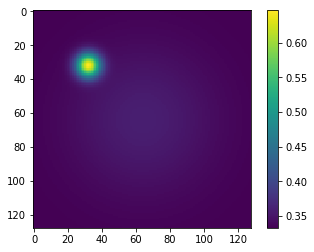

In [40]:
n_train_points = 1
n_val_points = 10
n_test_points = 10
n_time_steps = 500
dim = 128
width_small = 2#int(dim/2)

# params

#need to make dt much smaller for lorenz to be any good
w0 = 1.5
period = (2 * np.pi) / w0
print(period)
# width_small = 8
num_periods_big = 8

t_max = period * num_periods_big
print("t_max = ", t_max)


# paths
data_dir = '../data/toy5a'
result_dir = '../result/toy5a'


x = np.arange(dim)
y = np.arange(dim)
train_data = make_data(n_train_points, 'train_data.npy', data_dir = data_dir,dim=dim,n_time_steps=n_time_steps, t_max=t_max) 
print(train_data.shape)
plt.imshow(train_data[0,0])
plt.colorbar()
plt.show()
# val_data = make_data(n_val_points, 'val_data.npy', data_dir = data_dir,width_small=width_small,dim=dim) 
# test_data = make_data(n_test_points, 'test_data.npy', data_dir=data_dir,width_small=width_small,dim=dim) 



1.0


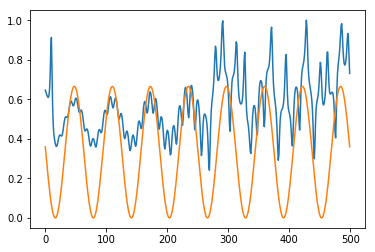

In [42]:
train_data.shape

plt.plot(train_data[0,:,32,32])
plt.plot(train_data[0,:,64,64])

print(np.max(train_data))

In [7]:
print(train_data.shape)
plt.imshow(train_data[2,0])
plt.colorbar()

(1, 500, 128, 128)


IndexError: index 2 is out of bounds for axis 0 with size 1

In [ ]:
print(train_data.shape)
mean_to_plot = np.mean(train_data[0], axis = (1,2)) 
# mean_to_plot = np.mean(train_data[0,:, :64,:64], axis = (1,2))
print(mean_to_plot.shape)
plt.plot(mean_to_plot)

# mean_to_plot = np.mean(train_data[0], axis = (1,2))
mean_to_plot = np.mean(train_data[0,:, :64,:64], axis = (1,2))
print(mean_to_plot.shape)
plt.plot(mean_to_plot)

# # mean_to_plot = np.mean(train_data[0], axis = (1,2))
# mean_to_plot = np.mean(train_data[0,:, :32,:32], axis = (1,2))
# print(mean_to_plot.shape)
# plt.plot(mean_to_plot)

In [ ]:
def animate(snapshots, normalize = True, file_name = "animation.gif"):
    """
    Makes an animation of snapshots in time
    
    inputs:
    snapshots: np.array of size (n_time_steps,1, dim, dim)
    normalize = True: whether to fix axis between 0 and 1 or not
    file_name = "animation.gif": file name of where to save gif
    
    outputs:
    no returned output
    gif saved to file_name
    """


    fps = 30
    nSeconds = len(snapshots)/fps
    
    # First set up the figure, the axis, and the plot element we want to animate
    fig = plt.figure( figsize=(8,8) )

    a = snapshots[0,:,:,:][0]
    if normalize:
        im = plt.imshow(a, interpolation='none', aspect='auto', vmin=0.0, vmax=1.0)
    else:
        im = plt.imshow(a, interpolation='none', aspect='auto', vmin=np.min(snapshots), vmax=np.max(snapshots))
    plt.colorbar()

    print("Animating, may take a little while...")

    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )

        im.set_array(snapshots[i,:,:,:,][0])
        return [im]

    anim = animation.FuncAnimation(
                                   fig,
                                   animate_func,
                                   frames = int(nSeconds * fps),
                                   interval = 1000 / fps, # in ms
                                   )
    writergif = animation.PillowWriter(fps=30)
    anim.save(file_name, writer=writergif)

    print('Done! gif saved to ', file_name)


Animating, may take a little while...
..................Done! gif saved to  ../result/toy5a/train_data.gif


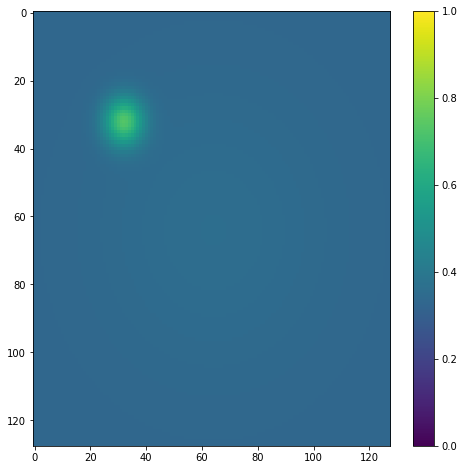

In [43]:
animate(train_data[0].reshape(n_time_steps,1, dim, dim), file_name = os.path.join(result_dir,'train_data.gif'))